In [89]:
import numpy as np
import pandas as pd
import prophet
from matplotlib import pyplot as plt
from datetime import datetime, timedelta
from copy import deepcopy

# Prophet algos on timeseries

Prophet is a [package from meta](https://peerj.com/preprints/3190/). The signal model is a [Generalised Additive Model](https://en.wikipedia.org/wiki/Generalized_additive_model), with four components:
- a trend component (saturated growth or piecewise linear)
- a seasonal component built out of global sinusoids
- a holiday component built out of indicator functions
- a noise component

## Periodic signals

As a test case, consider a sinusoid with additive noise.

### Signal generation

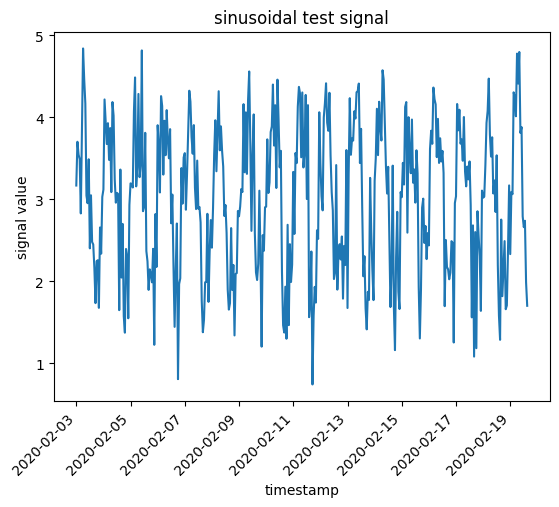

In [2]:
n_sample = 400
w_f = 2.0 * np.pi / 24.0
s_sin = 3 + np.sin([x * w_f for x in range(n_sample)]) + np.random.normal(loc=0.0, scale=0.5, size=n_sample)
t = [datetime(2020, 2, 3) + timedelta(hours=x) for x in range(n_sample)]
plt.plot(pd.DataFrame(
    {
        "data": s_sin, 
        "timestamp": t
    }).set_index("timestamp")
)
plt.xlabel("timestamp")
plt.xticks(rotation=45, ha="right")
plt.ylabel("signal value")
_ = plt.title("sinusoidal test signal")

In [20]:
df = pd.DataFrame(
    {
        "y": s_sin, 
        "ds": t
    }
)
len(df)

400

In [21]:
df_fit = df[:300]
len(df_fit)

300

## Modelling

### Basic modelling

Directly using the package out of the box on a noisy sinusoid seems to work pretty well.

In [72]:
model = prophet.Prophet()

In [73]:
model.fit(df_fit)

14:05:29 - cmdstanpy - INFO - Chain [1] start processing
14:05:29 - cmdstanpy - INFO - Chain [1] done processing


In [82]:
df_pred = model.predict(
    pd.DataFrame(df["ds"])
)

In [83]:
df_pred

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-02-03 00:00:00,2.963375,2.411936,3.658730,2.963375,2.963375,0.074787,0.074787,0.074787,0.074787,0.074787,0.074787,0.0,0.0,0.0,3.038162
1,2020-02-03 01:00:00,2.963495,2.640455,3.965067,2.963495,2.963495,0.353993,0.353993,0.353993,0.353993,0.353993,0.353993,0.0,0.0,0.0,3.317488
2,2020-02-03 02:00:00,2.963615,2.919291,4.199849,2.963615,2.963615,0.555586,0.555586,0.555586,0.555586,0.555586,0.555586,0.0,0.0,0.0,3.519201
3,2020-02-03 03:00:00,2.963734,3.014773,4.310545,2.963734,2.963734,0.693631,0.693631,0.693631,0.693631,0.693631,0.693631,0.0,0.0,0.0,3.657365
4,2020-02-03 04:00:00,2.963854,3.123673,4.394583,2.963854,2.963854,0.803439,0.803439,0.803439,0.803439,0.803439,0.803439,0.0,0.0,0.0,3.767293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,2020-02-19 11:00:00,3.010646,2.791342,4.073048,3.010645,3.010646,0.396884,0.396884,0.396884,0.396884,0.396884,0.396884,0.0,0.0,0.0,3.407530
396,2020-02-19 12:00:00,3.010765,2.479301,3.827026,3.010765,3.010765,0.143911,0.143911,0.143911,0.143911,0.143911,0.143911,0.0,0.0,0.0,3.154676
397,2020-02-19 13:00:00,3.010885,2.149188,3.465602,3.010885,3.010885,-0.182844,-0.182844,-0.182844,-0.182844,-0.182844,-0.182844,0.0,0.0,0.0,2.828041
398,2020-02-19 14:00:00,3.011005,1.806199,3.142644,3.011004,3.011005,-0.541511,-0.541511,-0.541511,-0.541511,-0.541511,-0.541511,0.0,0.0,0.0,2.469494


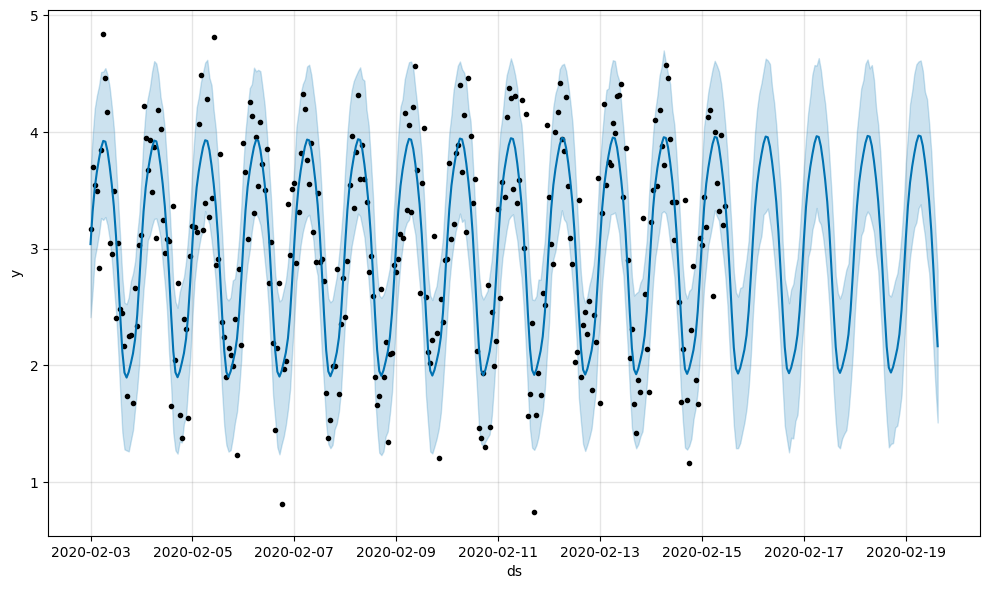

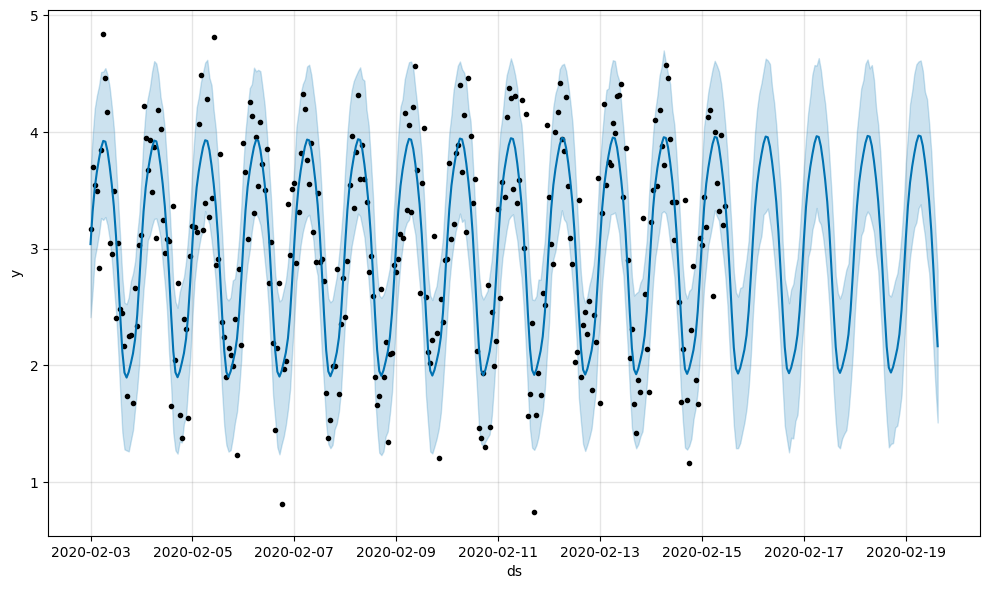

In [84]:
model.plot(df_pred)

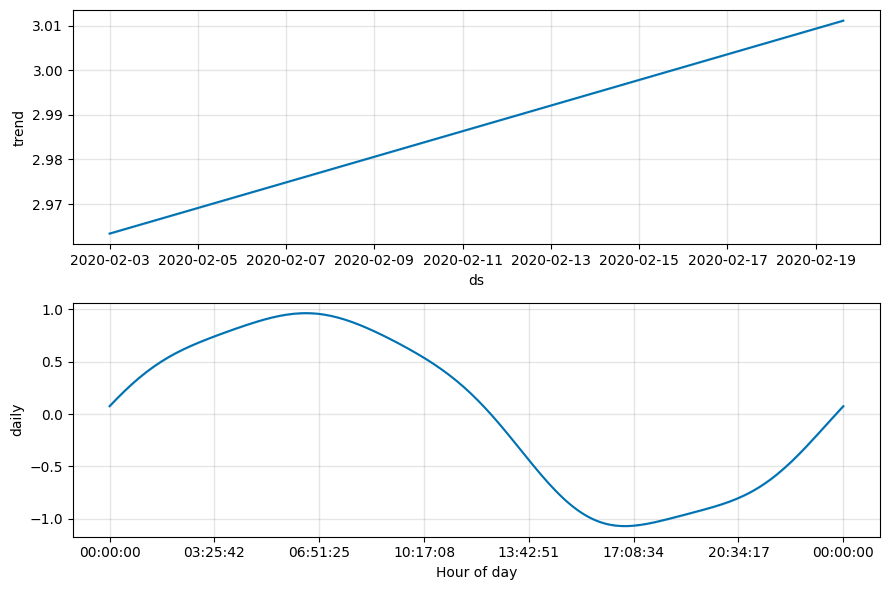

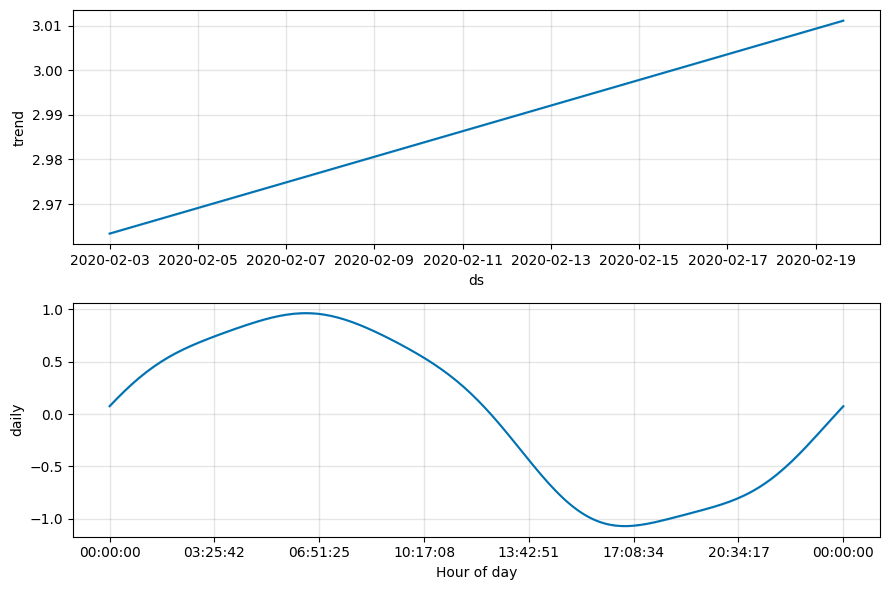

In [85]:
model.plot_components(df_pred)

In [95]:
def plot_prophet_results(df, n_fit):
    df_fit = df[:n_fit]
    model = prophet.Prophet()
    model.fit(df_fit)
    df_pred = model.predict(pd.DataFrame(df["ds"]))
    
    plt.plot(df.set_index("ds"), label="original signal")
    plt.plot(df_pred["ds"], df_pred["yhat"], color="orange", label="prediction")
    plt.plot(df_pred["ds"][:n_fit], df_pred["yhat"][:n_fit], color="red", label="fitted values")
    plt.fill_between(df_pred["ds"], df_pred["yhat_lower"], df_pred["yhat_upper"], color=(0.01, 0.4, 0.6, 0.2), label=f"confidence interval")

    plt.legend(loc="upper left")
    plt.xlabel("timestamp")
    plt.xticks(rotation=45, ha="right")
    plt.ylabel("signal value")
    plt.title("Prophet modelling of signal")

15:04:16 - cmdstanpy - INFO - Chain [1] start processing
15:04:16 - cmdstanpy - INFO - Chain [1] done processing


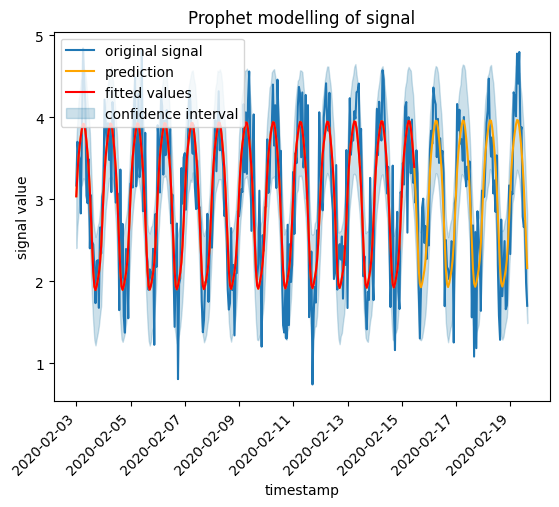

In [96]:
plot_prophet_results(df, 300)

### Datasets with NaNs or zeros 

Prophet seems to safely ignore nans.

The presence of zeros gives rise to long time-scale behaviour/interference. This is perhaps unsurprising given that the model is a GAM.

In [92]:
df_with_nans = deepcopy(df)
df_with_nans["y"][100:150] = np.nan

/tmp/ipykernel_86604/2246229399.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_nans["y"][100:150] = np.nan


15:04:23 - cmdstanpy - INFO - Chain [1] start processing
15:04:23 - cmdstanpy - INFO - Chain [1] done processing


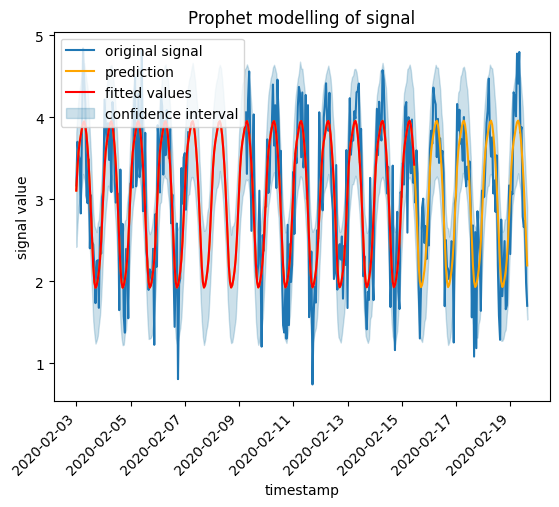

In [97]:
plot_prophet_results(df_with_nans, 300)

In [99]:
df_with_zeros = deepcopy(df)
df_with_zeros["y"][100:150] = 0.0

/tmp/ipykernel_86604/388340797.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_zeros["y"][100:150] = 0.0


15:07:01 - cmdstanpy - INFO - Chain [1] start processing
15:07:01 - cmdstanpy - INFO - Chain [1] done processing


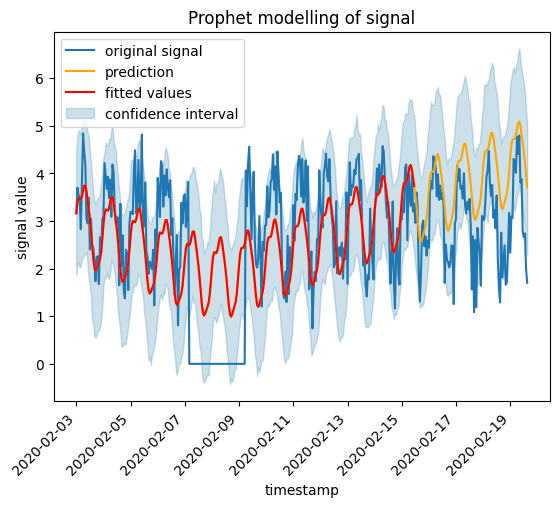

In [102]:
plot_prophet_results(df_with_zeros, 300)

## Periodic impulses

Begin a Generalised Additive Model, the fitting functions are smooth and global, meaning that spiky or impulsive behaviour gets smoothed out.

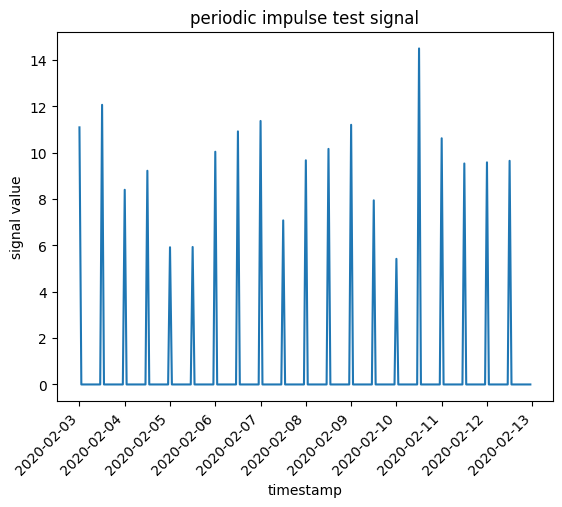

In [103]:
n_period = 20
period_samples = 12
n_sample = n_period * period_samples

s_periodic_impulse = np.zeros(n_sample)
s_periodic_impulse[::period_samples] = np.random.normal(loc=10, scale=2, size=n_period) 
t = [datetime(2020, 2, 3) + timedelta(hours=x) for x in range(n_sample)]

plt.plot(pd.DataFrame(
    {
        "data": s_periodic_impulse, 
        "timestamp": t
    }).set_index("timestamp")
)
plt.xlabel("timestamp")
plt.xticks(rotation=45, ha="right")
plt.ylabel("signal value")
_ = plt.title("periodic impulse test signal")

In [104]:
df_impulses = pd.DataFrame(
    {
        "y": s_periodic_impulse, 
        "ds": t
    }
)

15:13:43 - cmdstanpy - INFO - Chain [1] start processing
15:13:43 - cmdstanpy - INFO - Chain [1] done processing


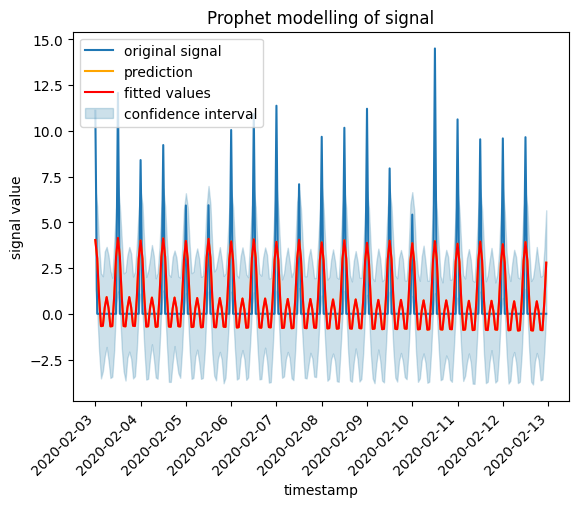

In [106]:
plot_prophet_results(df_impulses, 300)